In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Patentes/PatentesEnNuevasEnergía.csv", sep = ",")
df

,Year,Country/area,Sector,Technology,Sub Technology,Number of Patents
0,2000,Algeria,Building,Enabling Technologies,Smart Grids,1
1,2000,Algeria,Power,Enabling Technologies,Thermal energy storage,1
2,2000,Algeria,Power,Enabling Technologies,Hydrogen (storage and distribution and applica...,1
3,2000,Algeria,Power,Hydropower,Hydropower,1
4,2000,Algeria,Transport,Enabling Technologies,Energy Efficiency,1
...,...,...,...,...,...,...
31072,2021,United Kingdom,Power,Enabling Technologies,Batteries,1
31073,2021,United Kingdom,Power,Hydropower,Hydropower,1
31074,2021,United Kingdom,Power,Ocean Energy,Ocean Energy,1
31075,2021,United Kingdom,Power,Solar Energy,Solar Thermal,1


In [3]:
paises = ['Mexico','Cuba','Guatemala','Honduras','El Salvador','Nicaragua','Costa Rica','Dominican Republic',
'Haiti','Panama','Ecuador','Colombia','Venezuela','Peru','Brazil','Bolivia','Chile','Paraguay','Argentina','Uruguay']

In [4]:
cantidad = 0  #Obtenemos data frame con los paises de latino america 
CanPatentes = {} # la cantidad me sirve para saber si añade todos las filas
latam = pd.DataFrame ({
            'index': [],
            'Year': [],
            'Country/area': [],
            'Sector':[],
            'Technology':[],
            'Sub Technology': [],
            'Number of Patents': []
        },columns = ['index', 'Year', 'Country/area','Sector','Technology','Sub Technology','Number of Patents'])
for i in paises:    
    pais = df[df["Country/area"] == i]
    CanPatentes[i] = pais['Number of Patents'].sum()  #Sumamos las patentes 
    cantidad += pais.shape[0] #sabemos la cantidad de valores que hay en esa columna
    latam = pd.concat([latam, pais]) #Concatenamos el dataframe de cadas pais 

cantidad #Probamos la cantidad concatenada 

3853

In [5]:
CanPatentes

{'Mexico': 11631,
 'Cuba': 202,
 'Guatemala': 76,
 'Honduras': 13,
 'El Salvador': 21,
 'Nicaragua': 64,
 'Costa Rica': 205,
 'Dominican Republic': 89,
 'Haiti': 0,
 'Panama': 18,
 'Ecuador': 237,
 'Colombia': 846,
 'Venezuela': 0,
 'Peru': 775,
 'Brazil': 24415,
 'Bolivia': 0,
 'Chile': 2810,
 'Paraguay': 0,
 'Argentina': 2726,
 'Uruguay': 267}

In [6]:
#Lo transformamamos en un dataframe 
DFLationoAmerica = pd.DataFrame.from_dict(CanPatentes, orient='index').rename(columns={0:'Cantidad'})

DFLationoAmerica

,Cantidad
Mexico,11631
Cuba,202
Guatemala,76
Honduras,13
El Salvador,21
Nicaragua,64
Costa Rica,205
Dominican Republic,89
Haiti,0
Panama,18


<AxesSubplot:title={'center':'Número de patentes en los países Latino americanos'}, ylabel='Cantidad'>

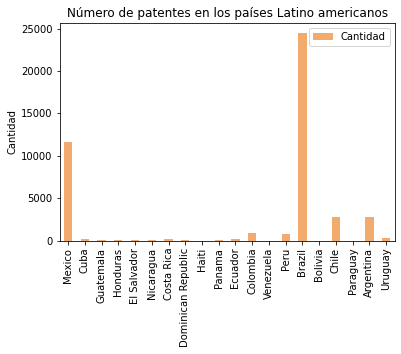

In [21]:
#Hacemos un histograma con las cantidades de pantentes en paises de latino america
DFLationoAmerica.plot(kind = 'bar',title="Número de patentes en los países Latino americanos", ylabel ="Cantidad",
                    color='#F2AB6D')


## Borramos Brazil y Mexico

In [23]:
del CanPatentes['Brazil']
del CanPatentes['Mexico']
CanPatentes

{'Cuba': 202,
 'Guatemala': 76,
 'Honduras': 13,
 'El Salvador': 21,
 'Nicaragua': 64,
 'Costa Rica': 205,
 'Dominican Republic': 89,
 'Haiti': 0,
 'Panama': 18,
 'Ecuador': 237,
 'Colombia': 846,
 'Venezuela': 0,
 'Peru': 775,
 'Bolivia': 0,
 'Chile': 2810,
 'Paraguay': 0,
 'Argentina': 2726,
 'Uruguay': 267}

<AxesSubplot:title={'center':'Número de patentes en los países Latino americanos Sin Brasil ni México'}, ylabel='Cantidad'>

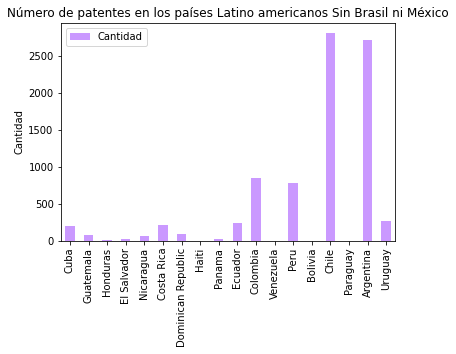

In [24]:
DFLationoAmericaSinBraMe = pd.DataFrame.from_dict(CanPatentes, orient='index').rename(columns={0:'Cantidad'})
DFLationoAmericaSinBraMe.plot(kind = 'bar',title="Número de patentes en los países Latino americanos Sin Brasil ni México", ylabel ="Cantidad",
                    color='#CA99FF')